In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import random
from skimage import io
from shutil import copyfile
import sys
import time

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import shutil as sh


In [2]:
annotations_file = 'annotations.csv'

In [3]:
anno = pd.read_csv(annotations_file)
anno.head()

,filename,x1,y1,x2,y2,class
0,db_lisa_tiny/sample_001.png,190,40,211,63,stop
1,db_lisa_tiny/sample_002.png,4,246,43,283,stop
2,db_lisa_tiny/sample_003.png,389,286,418,314,stop
3,db_lisa_tiny/sample_004.png,307,243,315,251,stop
4,db_lisa_tiny/sample_005.png,377,249,398,270,stop


In [4]:
# Code for plotting bounding box
def plot_bbox(img_id):
  img_url = img_id
  img = io.imread(img_url)
  height, width, channel = img.shape
  print(f"Image: {img.shape}")
  bboxs = anno[anno['filename']==img_id]
  for index, row in bboxs.iterrows():
      xmin = row['x1']
      xmax = row['x2']
      ymin = row['y1']
      ymax = row['y2']
      label_name = row['class']
      print(f"Coordinates: {xmin,ymin}, {xmax,ymax}")
      cv2.rectangle(img, (xmin,ymin), (xmax,ymax), (255,0,0), 5)
      font = cv2.FONT_HERSHEY_SIMPLEX
      cv2.putText(img, label_name, (xmin,ymin-10), font, 1, (0,255,0), 2)
  plt.figure(figsize=(15,10))
  plt.title('Image with Bounding Box')
  plt.imshow(img)
  plt.axis("off")
  plt.show()

Image: (480, 704, 3)
Coordinates: (190, 40), (211, 63)


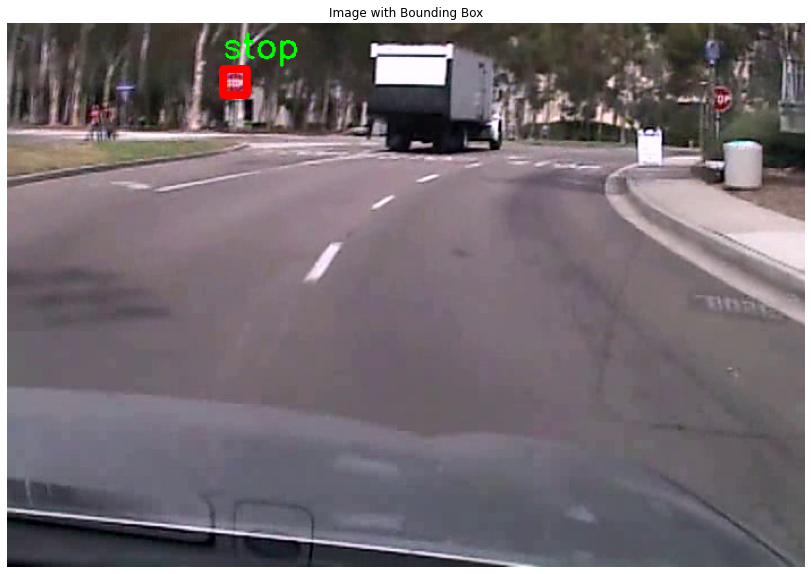

In [5]:
plot_bbox("db_lisa_tiny/sample_001.png")

Image: (480, 704, 3)
Coordinates: (326, 216), (355, 249)


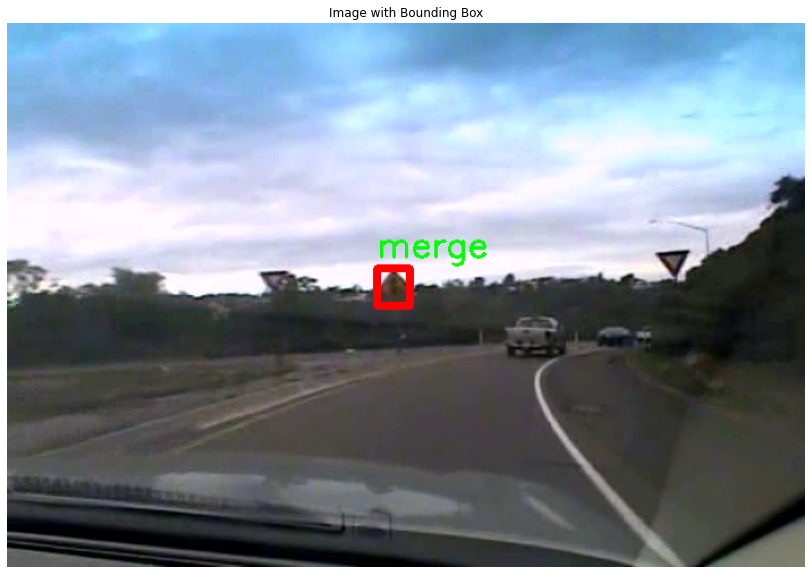

Image: (480, 704, 3)
Coordinates: (538, 178), (598, 232)


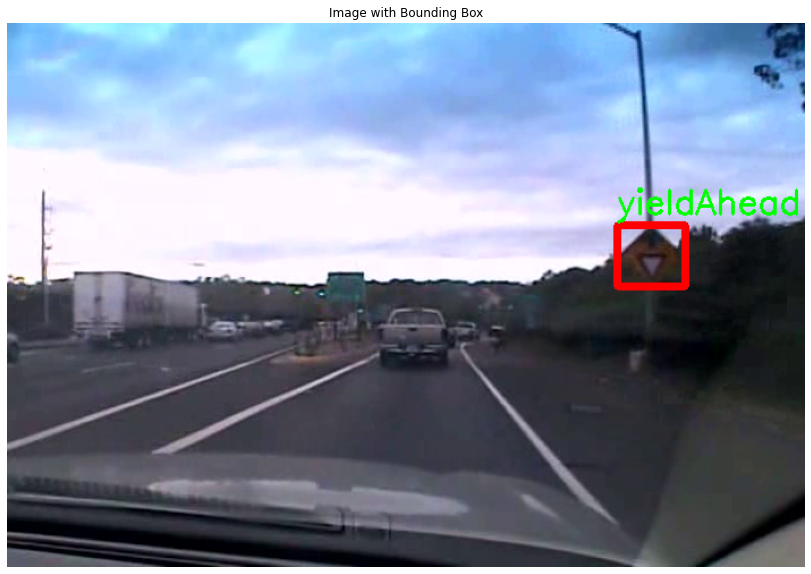

Image: (480, 704, 3)
Coordinates: (370, 298), (396, 321)


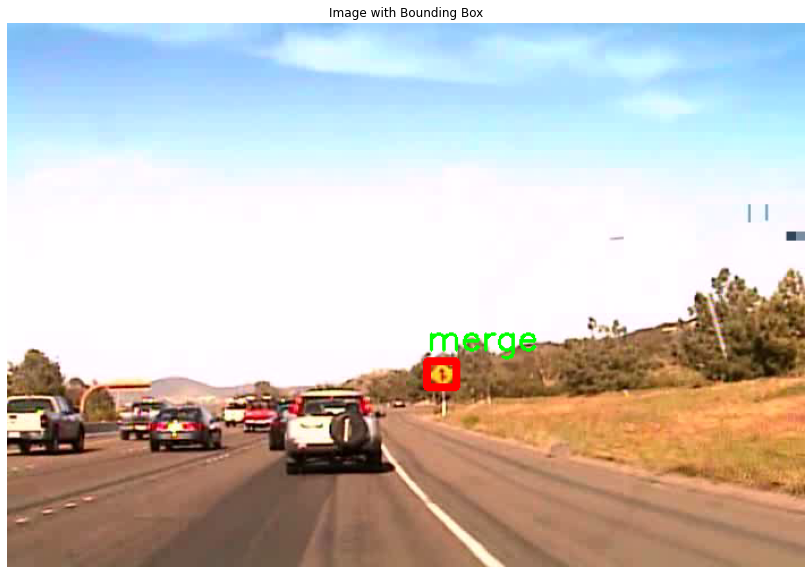

Image: (480, 704, 3)
Coordinates: (513, 274), (554, 312)


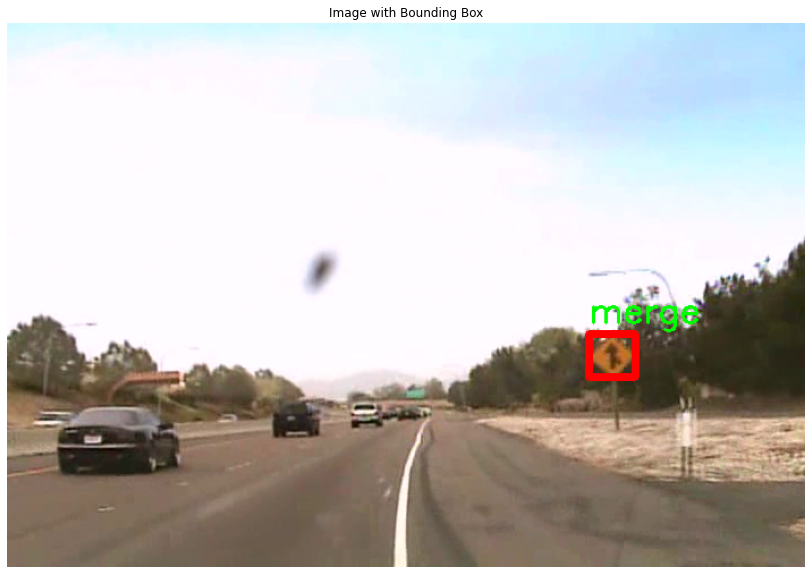

Image: (480, 704, 3)
Coordinates: (338, 241), (386, 302)


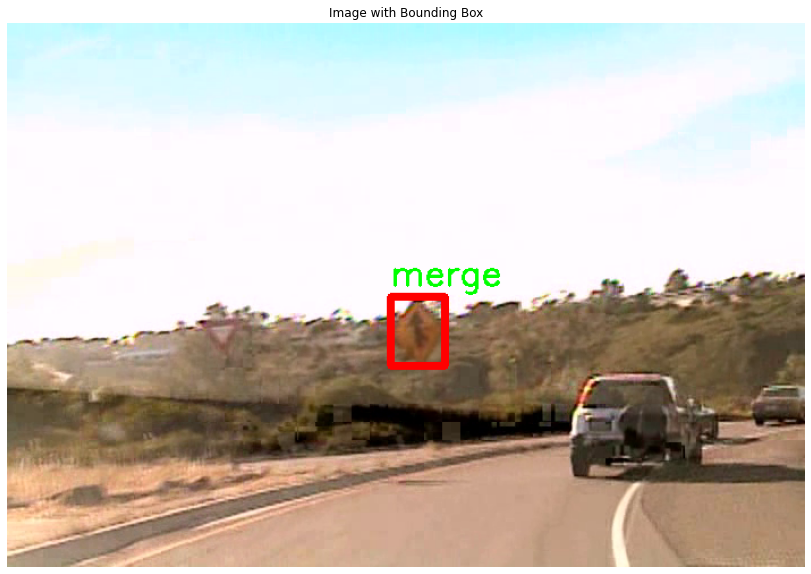

In [6]:
least_objects_img_ids = anno["filename"].value_counts().tail(50).index.values

for img_id in random.sample(list(least_objects_img_ids), 5):
  plot_bbox(img_id)

In [7]:
anno.value_counts("class")

class
stop                  210
keepRight             110
speedLimit35          110
merge                 100
pedestrianCrossing    100
signalAhead           100
speedLimit25           80
yield                  45
yieldAhead             45
dtype: int64

In [8]:
random.seed(60)

In [9]:
# Function for splitting dataset for trainand test data

def split_dataset(dataset, train_ratio):
    train_test = []

    for i in range(0,int(len(dataset)*train_ratio)):
        train_test.append("Train")

    for i in range(0,int(len(dataset)*(1-train_ratio))+1):
        train_test.append("Test")

    random.shuffle(train_test)

    # Add a column named Train/Test and add the column to the main dataframe
    dataset["Train/Test"] = train_test


In [10]:
split_dataset(anno, 0.8)

In [11]:
anno.value_counts("Train/Test")

Train/Test
Train    720
Test     180
dtype: int64

In [12]:
anno

,filename,x1,y1,x2,y2,class,Train/Test
0,db_lisa_tiny/sample_001.png,190,40,211,63,stop,Train
1,db_lisa_tiny/sample_002.png,4,246,43,283,stop,Train
2,db_lisa_tiny/sample_003.png,389,286,418,314,stop,Train
3,db_lisa_tiny/sample_004.png,307,243,315,251,stop,Train
4,db_lisa_tiny/sample_005.png,377,249,398,270,stop,Train
...,...,...,...,...,...,...,...
895,db_lisa_tiny/sample_896.png,534,155,563,187,speedLimit25,Train
896,db_lisa_tiny/sample_897.png,526,223,540,240,speedLimit25,Train
897,db_lisa_tiny/sample_898.png,633,236,663,269,speedLimit25,Train
898,db_lisa_tiny/sample_899.png,407,273,431,300,speedLimit25,Train


In [14]:
anno.to_csv("annotations_split.csv", index=False)